In [1]:
candidate_features = [
    "Customer_Age",
    "Dependent_count",
    "Education_Level",
    "Marital_Status_Uneducated",
    "Marital_Status_Single",
    "Marital_Status_Divorced",
    "Income_Category",
    "Card_Category",
    "Months_on_book",
    "Total_Relationship_Count",
    "Credit_Limit",
    "Total_Revolving_Bal"
]

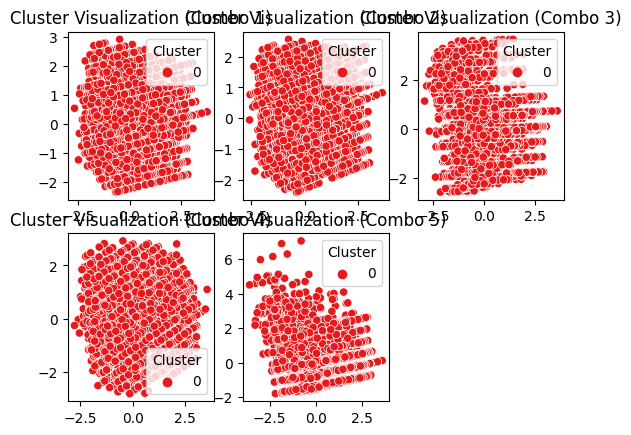

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
import seaborn as sns

# 데이터를 불러옵니다.
DATA_DIR = "../../data/"
data = pd.read_pickle(DATA_DIR + 'base_dataset_predict_proba.pkl')

# 클러스터&features 개수
n_clusters = 4
n_features = 4

# 모든 feature 조합을 생성합니다.
all_features = candidate_features
feature_combinations = list(combinations(all_features, n_features))

# 상위 5개 조합을 저장할 리스트를 초기화합니다.
top_combinations = []

# Elbow Method로 최적 클러스터 수 찾기
optimal_clusters = 0
best_inertia = float('inf')

for combo in feature_combinations:
    selected_features = list(combo)

    # 데이터를 표준화합니다.
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[selected_features])

    # Elbow Method를 사용하여 최적의 클러스터 수를 찾습니다.
    wcss = []
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

    if wcss[-1] < best_inertia:
        best_inertia = wcss[-1]
        optimal_clusters = wcss.index(best_inertia) + 1
        best_feature_combo = selected_features

    # 상위 5개 조합을 저장
    top_combinations.append((selected_features, optimal_clusters))

# 상위 5개 조합을 선택
top_combinations.sort(key=lambda x: x[1])
top_combinations = top_combinations[:5]

# PCA를 사용하여 2D로 군집화한 시각화
for i, (features, clusters) in enumerate(top_combinations):
    selected_data = data[features]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_data)

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    data['Cluster'] = kmeans.labels_

    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='Set1')
    plt.title(f'Cluster Visualization (Combo {i+1})')

plt.show()

In [7]:
print(top_5_combinations)

[['Customer_Age', 'Card_Category', 'Credit_Limit', 'Total_Revolving_Bal'], ['Marital_Status_Single', 'Marital_Status_Divorced', 'Income_Category', 'Total_Relationship_Count'], ['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status_Uneducated'], ['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status_Single'], ['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status_Divorced']]
